In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_merged_data_15days.csv'
df = pd.read_csv(file_path)

In [3]:
df

,group,Date,KWH,Next_3_Days_Energy_Total,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1,2012-09-28,920.374,1031.111000,5.0,1.60,73.0,16.70,13.30,8.50,0.20,101300.0,0.0
1,1,2012-09-29,946.774,1045.833000,1.0,8.70,146.0,18.10,12.70,8.60,0.00,101830.0,0.0
2,1,2012-09-30,997.614,1059.146667,5.0,1.60,71.0,17.30,12.10,6.10,4.20,101870.0,0.0
3,1,2012-10-01,932.968,1051.590333,6.0,2.70,85.0,17.90,15.20,13.00,2.60,101190.0,0.0
4,1,2012-10-02,923.616,1039.082667,6.0,2.80,85.0,15.10,14.40,10.90,1.20,100970.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27323,55,2014-02-03,1089.332,1070.176000,3.0,1.00,34.0,9.40,6.10,3.40,0.00,100370.0,0.0
27324,55,2014-02-04,1061.265,1018.218000,5.0,3.90,57.0,10.10,6.80,4.20,11.20,99670.0,0.0
27325,55,2014-02-05,1106.654,1010.964667,6.2,1.66,53.4,9.74,6.80,4.46,3.80,101172.0,0.0
27326,55,2014-02-06,1119.021,993.217000,5.0,0.00,21.0,9.80,8.40,6.70,19.00,98980.0,0.0


In [4]:
df = df.rename(columns={'Next_3_Days_Energy_Total': 'Next_15_Days_Energy_Total'})

In [5]:
missing_counts = df.isna().sum()
print(missing_counts)

group                        0
Date                         0
KWH                          0
Next_15_Days_Energy_Total    0
cloud_cover                  0
sunshine                     0
global_radiation             0
max_temp                     0
mean_temp                    0
min_temp                     0
precipitation                0
pressure                     0
snow_depth                   0
dtype: int64


#### cloud_cover processing

In [6]:
df['cloud_cover'].value_counts()

6.000000    4366
7.000000    3901
4.000000    3644
8.000000    3620
5.000000    3436
3.000000    2694
2.000000    2255
1.000000    1644
0.000000    1430
5.400000      40
5.600000      33
5.200000      28
5.800000      26
4.800000      25
6.200000      25
4.600000      25
4.400000      21
6.600000      20
6.400000      18
4.200000      15
3.800000      11
2.800000       9
6.800000       8
3.200000       7
3.400000       5
7.200000       4
3.600000       4
7.400000       4
4.757959       3
2.600000       2
2.400000       2
7.600000       2
2.200000       1
Name: cloud_cover, dtype: int64

In [7]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [8]:
df['cloud_cover'].value_counts()

6.0    4366
7.0    3901
4.0    3644
8.0    3620
5.0    3436
3.0    2694
2.0    2255
1.0    1644
0.0    1430
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [9]:
df['sunshine'] = df['sunshine'] * 60

#### change snow depth into a category value

In [10]:
df['snow_depth'].value_counts()

0.0    26767
3.0      110
2.0       55
5.0       55
1.0        1
0.6        1
1.2        1
Name: snow_depth, dtype: int64

In [11]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [12]:
df['snow_depth'].value_counts()

0.0    26767
1.0      223
Name: snow_depth, dtype: int64

#### change the precipitation into category value

In [13]:
df['precipitation'].value_counts()

0.00    11479
0.20     3733
0.40      990
1.80      660
1.20      602
        ...  
4.08        1
2.44        1
0.48        1
3.48        1
3.56        1
Name: precipitation, Length: 133, dtype: int64

In [14]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

In [15]:
df['precipitation'].value_counts()

0    11481
1     8784
2     5520
3     1205
4        0
Name: precipitation, dtype: int64

#### one-hot encoding

In [16]:
df_encoded = pd.get_dummies(df['cloud_cover'], prefix='cloud_cover')

df = pd.concat([df, df_encoded], axis=1)

df.drop('cloud_cover', axis=1, inplace=True)

In [17]:
df_encoded = pd.get_dummies(df['precipitation'], prefix='precipitation')

df = pd.concat([df, df_encoded], axis=1)

df.drop('precipitation', axis=1, inplace=True)

In [18]:
df_encoded = pd.get_dummies(df['snow_depth'], prefix='snow_depth')

df = pd.concat([df, df_encoded], axis=1)

df.drop('snow_depth', axis=1, inplace=True)

In [19]:
df.head(5)

,group,Date,KWH,Next_15_Days_Energy_Total,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,1,2012-09-28,920.374,1031.111000,96.0,73.0,16.7,13.3,8.5,101300.0,...,0,0,0,0,1,0,0,0,1,0
1,1,2012-09-29,946.774,1045.833000,522.0,146.0,18.1,12.7,8.6,101830.0,...,0,0,0,1,0,0,0,0,1,0
2,1,2012-09-30,997.614,1059.146667,96.0,71.0,17.3,12.1,6.1,101870.0,...,0,0,0,0,0,1,0,0,1,0
3,1,2012-10-01,932.968,1051.590333,162.0,85.0,17.9,15.2,13.0,101190.0,...,1,0,0,0,0,1,0,0,1,0
4,1,2012-10-02,923.616,1039.082667,168.0,85.0,15.1,14.4,10.9,100970.0,...,1,0,0,0,1,0,0,0,1,0


In [20]:
df_out = df.copy()

#### delete the date

In [21]:
del df['Date']
del df['group']

In [22]:
df.head()

,KWH,Next_15_Days_Energy_Total,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,cloud_cover_0.0,cloud_cover_1.0,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,920.374,1031.111000,96.0,73.0,16.7,13.3,8.5,101300.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,946.774,1045.833000,522.0,146.0,18.1,12.7,8.6,101830.0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,997.614,1059.146667,96.0,71.0,17.3,12.1,6.1,101870.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,932.968,1051.590333,162.0,85.0,17.9,15.2,13.0,101190.0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,923.616,1039.082667,168.0,85.0,15.1,14.4,10.9,100970.0,0,0,...,1,0,0,0,1,0,0,0,1,0


#### normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure', 'KWH']

scaler = MinMaxScaler()


df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

#### check if any INF or NAN

In [24]:
inf_check = np.isinf(df)
print(inf_check.any())

KWH                          False
Next_15_Days_Energy_Total    False
sunshine                     False
global_radiation             False
max_temp                     False
mean_temp                    False
min_temp                     False
pressure                     False
cloud_cover_0.0              False
cloud_cover_1.0              False
cloud_cover_2.0              False
cloud_cover_3.0              False
cloud_cover_4.0              False
cloud_cover_5.0              False
cloud_cover_6.0              False
cloud_cover_7.0              False
cloud_cover_8.0              False
precipitation_0              False
precipitation_1              False
precipitation_2              False
precipitation_3              False
precipitation_4              False
snow_depth_0.0               False
snow_depth_1.0               False
dtype: bool


In [25]:
inf_check = np.isnan(df)
print(inf_check.any())

KWH                          False
Next_15_Days_Energy_Total    False
sunshine                     False
global_radiation             False
max_temp                     False
mean_temp                    False
min_temp                     False
pressure                     False
cloud_cover_0.0              False
cloud_cover_1.0              False
cloud_cover_2.0              False
cloud_cover_3.0              False
cloud_cover_4.0              False
cloud_cover_5.0              False
cloud_cover_6.0              False
cloud_cover_7.0              False
cloud_cover_8.0              False
precipitation_0              False
precipitation_1              False
precipitation_2              False
precipitation_3              False
precipitation_4              False
snow_depth_0.0               False
snow_depth_1.0               False
dtype: bool


In [26]:
df.columns

Index(['KWH', 'Next_15_Days_Energy_Total', 'sunshine', 'global_radiation',
       'max_temp', 'mean_temp', 'min_temp', 'pressure', 'cloud_cover_0.0',
       'cloud_cover_1.0', 'cloud_cover_2.0', 'cloud_cover_3.0',
       'cloud_cover_4.0', 'cloud_cover_5.0', 'cloud_cover_6.0',
       'cloud_cover_7.0', 'cloud_cover_8.0', 'precipitation_0',
       'precipitation_1', 'precipitation_2', 'precipitation_3',
       'precipitation_4', 'snow_depth_0.0', 'snow_depth_1.0'],
      dtype='object')

In [27]:
df = df.astype('float32')

In [28]:
df.dtypes

KWH                          float32
Next_15_Days_Energy_Total    float32
sunshine                     float32
global_radiation             float32
max_temp                     float32
mean_temp                    float32
min_temp                     float32
pressure                     float32
cloud_cover_0.0              float32
cloud_cover_1.0              float32
cloud_cover_2.0              float32
cloud_cover_3.0              float32
cloud_cover_4.0              float32
cloud_cover_5.0              float32
cloud_cover_6.0              float32
cloud_cover_7.0              float32
cloud_cover_8.0              float32
precipitation_0              float32
precipitation_1              float32
precipitation_2              float32
precipitation_3              float32
precipitation_4              float32
snow_depth_0.0               float32
snow_depth_1.0               float32
dtype: object

In [29]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [30]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

new_order = ['KWH', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp',
       'pressure', 'cloud_cover_0.0', 'cloud_cover_1.0',
       'cloud_cover_2.0', 'cloud_cover_3.0', 'cloud_cover_4.0',
       'cloud_cover_5.0', 'cloud_cover_6.0', 'cloud_cover_7.0',
       'cloud_cover_8.0', 'precipitation_0', 'precipitation_1',
       'precipitation_2', 'precipitation_3', 'precipitation_4',
       'snow_depth_0.0', 'snow_depth_1.0', 'Next_15_Days_Energy_Total']
df = df[new_order]
data = df.values

In [31]:
df.columns

Index(['KWH', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'pressure', 'cloud_cover_0.0', 'cloud_cover_1.0',
       'cloud_cover_2.0', 'cloud_cover_3.0', 'cloud_cover_4.0',
       'cloud_cover_5.0', 'cloud_cover_6.0', 'cloud_cover_7.0',
       'cloud_cover_8.0', 'precipitation_0', 'precipitation_1',
       'precipitation_2', 'precipitation_3', 'precipitation_4',
       'snow_depth_0.0', 'snow_depth_1.0', 'Next_15_Days_Energy_Total'],
      dtype='object')

In [32]:
data.shape

(26990, 24)

In [33]:
def split_dataset_into_seq(dataset, start_index=0, end_index=None, history_size=50, step=1):
    '''split the dataset to have sequence of observations of length history size'''
    data = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)

In [34]:
def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.5, save_path=None):
    '''split the dataset into train, val and test splits'''
    # normalization
    data_mean = data[:, :23].mean(axis=0)
    data_std = data[:, :23].std(axis=0)
    epsilon = 1e-8
    standardized_data = (data[:, :23] - data_mean) / (data_std + epsilon)
    data = np.concatenate((standardized_data, data[:, 23:]), axis=1)

    data_in_seq = split_dataset_into_seq(data, start_index=0, end_index=None, history_size=50, step=1)

    # split between validation dataset and test set:
    train_data, val_data = train_test_split(data_in_seq, train_size=TRAIN_SPLIT, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, train_size=VAL_SPLIT, shuffle=True, random_state=123)

    return train_data, val_data, test_data

In [35]:
def data_to_dataset(train_data, val_data, test_data, batch_size=32, target_features=list(range(23, 24))):
    '''
    split each train split into inputs and targets
    convert each train split into a tf.dataset
    '''
    x_train = torch.tensor(train_data[:, :, :target_features[0]], device=device)
    print('shape of x_train: ', x_train.shape)
    y_train = torch.tensor(train_data[:, -1, target_features], device=device)
    print('shape of y_train: ', y_train.shape)
    x_val = torch.tensor(val_data[:, :, :target_features[0]], device=device)
    print('shape of x_val: ', x_val.shape)
    y_val = torch.tensor(val_data[:, -1, target_features], device=device)
    print('shape of y_val: ', y_val.shape)
    x_test = torch.tensor(test_data[:, :, :target_features[0]], device=device)
    print('shape of x_test: ', x_test.shape)
    y_test = torch.tensor(test_data[:, -1, target_features], device=device)
    print('shape of y_test: ', y_test.shape)
    #x_train, y_train = split_fn(train_data)
    #x_val, y_val = split_fn(val_data)
    #x_test, y_test = split_fn(test_data)

    #x_train = x_train[:, :, :target_features[0]]
    #y_val = y_val[:, :, :target_features[0]]
    #y_test = y_test[:, :, :target_features[0]]
    # selecting only the last 3 features for prediction:
    #y_train = y_train[:, :, target_features]
    #y_val = y_val[:, :, target_features]
    #y_test = y_test[:, :, target_features]
    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader

In [36]:
train_data, val_data, test_data = split_dataset(data)
train_dataset, val_dataset, test_dataset = data_to_dataset(train_data, val_data, test_data)

shape of x_train:  torch.Size([18858, 50, 23])
shape of y_train:  torch.Size([18858, 1])
shape of x_val:  torch.Size([4041, 50, 23])
shape of y_val:  torch.Size([4041, 1])
shape of x_test:  torch.Size([4041, 50, 23])
shape of y_test:  torch.Size([4041, 1])


In [37]:
train_data.shape

(18858, 50, 24)

In [38]:
for batch_data, batch_labels in train_dataset:
    # batch_data是一个包含数据批次的Tensor
    # batch_labels是一个包含相应标签的Tensor

    # 打印第一个批次数据的形状
    print("Batch Data Shape:", batch_data.shape)
    print("Batch Labels Shape:", batch_labels.shape)

    # 退出循环，只查看第一个批次
    break

Batch Data Shape: torch.Size([32, 50, 23])
Batch Labels Shape: torch.Size([32, 1])


#### Implement the Transformer model

In [39]:
import torch.nn as nn
import math

class MultiHeadAttention(nn.Module):
    '''Multi-head self-attention module'''
    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        self.H = H # number of heads
        self.D = D # dimension

        # Linear transformations for queries, keys, and values
        self.wq = nn.Linear(D, D*H)
        self.wk = nn.Linear(D, D*H)
        self.wv = nn.Linear(D, D*H)

        # Linear transformation for output
        self.dense = nn.Linear(D*H, D)

    def concat_heads(self, x):
        '''(B, H, S, D) => (B, S, D*H)'''
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H*D))   # (B, S, D*H)
        return x

    def split_heads(self, x):
        '''(B, S, D*H) => (B, H, S, D)'''
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)    # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):

        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2)) #(B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        # add the mask to the scaled tensor.
        if mask is not None:
            attention_scores += (mask * -1e9)

        attention_weights = nn.Softmax(dim=-1)(attention_scores)
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention) # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights

In [40]:
# Positional encodings
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates


def positional_encoding(D, position=60, dim=3, device=device):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(D)[np.newaxis, :], D)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis,np.newaxis,  ...]
    return torch.tensor(pos_encoding, device=device)

In [41]:
# function that implement the look_ahead mask for masking future time steps.
def create_look_ahead_mask(size, device=device):
    mask = torch.ones((size, size), device=device)
    mask = torch.triu(mask, diagonal=1)
    return mask  # (size, size)

In [42]:
create_look_ahead_mask(6)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [43]:
class TransformerLayer(nn.Module):
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        super(TransformerLayer, self).__init__()
        self.dropout_rate = dropout_rate
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)


    def forward(self, x, look_ahead_mask):

        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        attn = self.dropout1(attn) # (B,S,D)
        attn = self.layernorm1(attn + x) # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        mlp_act = self.mlp_out(mlp_act)
        mlp_act = self.dropout2(mlp_act)

        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights

In [44]:
class TransformerEncoder(nn.Module):
    '''Transformer Encoder Implementing several Encoder Layers.
    '''
    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, dropout_rate):
        super(TransformerEncoder, self).__init__()
        self.num_layers = num_layers
        self.input_projection = nn.Linear(inp_features, D)  # multivariate input
        self.pos_encoding = positional_encoding(D)
        self.enc_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, dropout_rate=dropout_rate) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask):
        B, S, D = x.shape
        x = self.input_projection(x)
        x += self.pos_encoding[:, :S, :]
        x = self.dropout(x)

        for i in range(self.num_layers):
            x, _ = self.enc_layers[i](x=x, look_ahead_mask=mask)

        return x

In [45]:
class Transformer(nn.Module):
    '''Transformer Encoder-Decoder Architecture.
    '''
    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate):
        super(Transformer, self).__init__()
        self.encoder = TransformerEncoder(num_layers, D, H, hidden_mlp_dim, inp_features, dropout_rate)
        self.decoder = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim, dropout_rate=dropout_rate) for _ in range(num_layers)])
        self.sqrt_D = torch.tensor(math.sqrt(D))
        self.output_projection = nn.Linear(D, out_features)  # multivariate output

    def forward(self, x, mask):
        enc_output = self.encoder(x, mask)
        B, S, D = enc_output.shape
        dec_attention_weights = {}

        for i, layer in enumerate(self.decoder):
            enc_output, block = layer(x=enc_output, look_ahead_mask=mask)
            dec_attention_weights['decoder_layer{}'.format(i + 1)] = block

        dec_output = self.output_projection(enc_output)

        return dec_output[:, -1, :], dec_attention_weights  # (B,S,S)

#### early stop

In [46]:
# 定义早停函数
def early_stopping(val_loss, patience=10, delta=0):
  if len(val_loss) < patience + 1:
    return False

  best_loss = min(val_loss[:-patience])
  last_loss = val_loss[-1]

  if last_loss > best_loss - delta:
    return True

  return False

#### fitness function

In [ ]:
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR

def Transformer_fitness_function(params):

    # Defince the parameters
    num_layers = [4, 6][int(params[0])]
    D = [64, 128, 256][int(params[1])]
    H = [6, 8, 10][int(params[2])]
    hidden_mlp_dim = int(params[3]) # 通常在 D 的一定倍数内选择，例如在 D 的 2 到 4 倍之间
    dropout_rate = params[4]
    learning_rate = params[5]
    n_epochs = [50, 100][int(params[6])]
    niter = len(train_dataset)

    transformer = Transformer(num_layers=num_layers, D=D, H=H, hidden_mlp_dim=hidden_mlp_dim*D, inp_features=23, out_features=1, dropout_rate=dropout_rate).to(device)
    optimizer = torch.optim.Adam(transformer.parameters(), lr=learning_rate)

    # train!!!
    losses, val_losses = [], []
    best_model_state = None

    # 学习率衰减
    step_size = 5
    gamma = 0.9
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    for e in tqdm(range(n_epochs)):
        # one epoch on train set
        transformer.train()
        sum_train_loss = 0.0
        for x, y in train_dataset:
            optimizer.zero_grad()
            S = x.shape[1]
            mask = create_look_ahead_mask(S)
            out, _ = transformer(x, mask)
            loss = torch.nn.L1Loss()(out, y)

            loss.backward()
            optimizer.step()

            sum_train_loss += loss.item()

        scheduler.step()
        losses.append(sum_train_loss / niter)

        # Evaluate on val set
        transformer.eval()
        sum_val_loss = 0.0
        total_val_samples = 0
        for i, (x, y) in enumerate(val_dataset):
            S = x.shape[1]
            mask = create_look_ahead_mask(S)
            out, _ = transformer(x, mask)
            loss = torch.nn.L1Loss()(out, y)
            sum_val_loss += loss.item()
        val_losses.append(sum_val_loss / (i + 1))

        # 检查是否早停
        if early_stopping(val_losses, patience=30, delta=0.5):
            print("\n Early stopping triggered!")
            best_model_state = transformer.state_dict()
            break

    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)
    transformer.eval()

    with torch.no_grad():
        total_mae = 0.0
        for i, (x, y) in enumerate(val_dataset):
            S = x.shape[1]
            mask = create_look_ahead_mask(S)
            out, _ = transformer(x, mask)
            loss = torch.nn.L1Loss()(out, y)
            total_mae += loss.item()

        # Calculate the average loss for the entire validation set
        #print(total_mse)
        mae_loss = total_mae / (i + 1)

        # Print the average loss for this validation set
        #print(f"Validation Loss: {validation_loss:.4f}")

    return mae_loss

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15080 sha256=dfe2e6a7bbed0ec9df57a449288f8722243aaa97b9732779b9fb7a85e7c62333
  Stored in directory: /root/.cache/pip/wheels/3f/83/19/b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout


 35%|███▌      | 35/100 [07:57<14:46, 13.63s/it]


 Early stopping triggered!



 64%|██████▍   | 32/50 [11:31<06:29, 21.61s/it]


 Early stopping triggered!



 62%|██████▏   | 31/50 [14:42<09:01, 28.48s/it]


 Early stopping triggered!



 74%|███████▍  | 37/50 [12:04<04:14, 19.59s/it]


 Early stopping triggered!



100%|██████████| 50/50 [10:51<00:00, 13.04s/it]


|||||||||||||||||_________________________________ 33.3% GA is running...

 80%|████████  | 40/50 [09:01<02:15, 13.54s/it]


 Early stopping triggered!



 84%|████████▍ | 42/50 [09:19<01:46, 13.31s/it]


 Early stopping triggered!



 80%|████████  | 40/50 [08:48<02:12, 13.22s/it]


 Early stopping triggered!


|||||||||||||||||||||||||||||||||_________________ 66.7% GA is running...

 72%|███████▏  | 36/50 [07:59<03:06, 13.31s/it]


 Early stopping triggered!



 80%|████████  | 40/50 [08:42<02:10, 13.07s/it]


 Early stopping triggered!



 80%|████████  | 40/50 [08:44<02:11, 13.10s/it]


 Early stopping triggered!


|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

 80%|████████  | 40/50 [12:43<03:10, 19.09s/it]


 Early stopping triggered!



 68%|██████▊   | 34/50 [09:15<04:21, 16.35s/it]


 Early stopping triggered!


 The best solution found:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.00000000e+00
 1.36720758e-01 3.65116051e-04 0.00000000e+00]

 Objective function:
 33.35353136438084


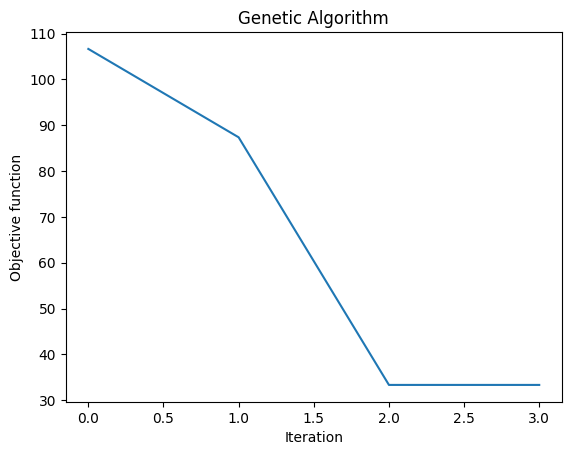

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


varbound = np.array([          [0, 1],              # num_layers
                     [0, 2],               # D
                     [0, 2],               # H
                     [2, 4],               # hidden_mlp_dim
                     [0, 0.2],              # dropout_rate
                     [0.00005, 0.001],            # learning_rate
                     [0, 1]                # n_epochs
                     ])



# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 3, 'population_size': 5, 'elit_ratio': 0.00,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=Transformer_fitness_function, dimension=7, variable_type='real',
           variable_type_mixed  = np.array(['int', 'int', 'int', 'int', 'real', 'real', 'int']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 100000)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']




#### model

In [47]:
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR

num_layers = [4, 6, 8][int(0.00000000e+00)]
D = [64, 128, 256][int(0.00000000e+00)]
H = [6, 8, 10, 12][int(0.00000000e+00)]
hidden_mlp_dim = int(3.00000000e+00) # 通常在 D 的一定倍数内选择，例如在 D 的 2 到 4 倍之间
dropout_rate = 1.36720758e-01
learning_rate = 3.65116051e-04
n_epochs = [50, 100, 200][int(0.00000000e+00)]
niter = len(train_dataset)

transformer = Transformer(num_layers=num_layers, D=D, H=H, hidden_mlp_dim=hidden_mlp_dim*D, inp_features=23, out_features=1, dropout_rate=dropout_rate).to(device)
optimizer = torch.optim.Adam(transformer.parameters(), lr=learning_rate)

# train!!!
losses, val_losses = [], []
best_model_state = None

# 学习率衰减
step_size = 5
gamma = 0.9
scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

for e in tqdm(range(n_epochs)):
    # one epoch on train set
    transformer.train()
    sum_train_loss = 0.0
    for x, y in train_dataset:
        optimizer.zero_grad()
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.L1Loss()(out, y)

        loss.backward()
        optimizer.step()

        sum_train_loss += loss.item()

    scheduler.step()
    losses.append(sum_train_loss / niter)

    # Evaluate on val set
    transformer.eval()
    sum_val_loss = 0.0
    total_val_samples = 0
    for i, (x, y) in enumerate(val_dataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.L1Loss()(out, y)
        sum_val_loss += loss.item()
    val_losses.append(sum_val_loss / (i + 1))

    # 检查是否早停
    if early_stopping(val_losses, patience=30, delta=0.5):
        print("\n Early stopping triggered!")
        best_model_state = transformer.state_dict()
        break

    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)


100%|██████████| 50/50 [11:36<00:00, 13.93s/it]


In [48]:
def median_absolute_error(y_true, y_pred):
    absolute_errors = torch.abs(y_true - y_pred)
    return torch.median(absolute_errors).item()

In [49]:
def pearson_correlation(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    numerator = torch.sum((y_true - y_true_mean) * (y_pred - y_pred_mean))
    denominator = torch.sqrt(torch.sum((y_true - y_true_mean) ** 2)) * torch.sqrt(torch.sum((y_pred - y_pred_mean) ** 2))
    pearson_corr = numerator / denominator
    return pearson_corr.item()

In [50]:
def index_of_agreement(y_true, y_pred):
    numerator = torch.sum((y_true - y_pred) ** 2)
    denominator = torch.sum((torch.abs(y_pred - torch.mean(y_true)) + torch.abs(y_true - torch.mean(y_true))) ** 2)
    index_agreement = 1 - (numerator / denominator)
    return index_agreement.item()

In [58]:
transformer.eval()

with torch.no_grad():
    total_mse = 0.0
    total_mae = 0.0
    total_md_ae = 0.0
    total_mape = 0.0
    total_rmspe = 0.0
    total_pearson_corr = 0.0
    total_index_agreement = 0.0
    predictions_list = []
    y_values = []


    for i, (x, y) in enumerate(test_dataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)

        predictions_list.append(out.cpu().numpy())
        y_values.append(y.cpu().numpy())

        # Compute the loss (MSE)
        loss = torch.nn.MSELoss()(out, y)
        total_mse += loss.item()

        # Compute the loss (MAE)
        mae = torch.mean(torch.abs(out - y))
        total_mae += mae.item()

        # Compute the loss (MdAE)
        md_ae = median_absolute_error(out, y)
        total_md_ae += md_ae

        # Compute the loss (MAPE)
        absolute_percentage_errors = torch.abs((y - out) / y)
        absolute_percentage_errors = absolute_percentage_errors[~torch.isinf(absolute_percentage_errors) & ~torch.isnan(absolute_percentage_errors)]
        mape = torch.mean(absolute_percentage_errors).item() * 100
        total_mape += mape

        # Compute the loss (RMSPE)
        squared_percentage_errors = ((y - out) / y) ** 2
        squared_percentage_errors = squared_percentage_errors[~torch.isinf(squared_percentage_errors)]
        rmspe = torch.sqrt(torch.mean(squared_percentage_errors)).item() * 100
        total_rmspe += rmspe

        # Compute the Pearson Correlation Coefficient
        pearson_corr = pearson_correlation(y, out)
        total_pearson_corr += pearson_corr

        # Compute the Index of Agreement
        index_agreement = index_of_agreement(y, out)
        total_index_agreement += index_agreement


    mse_loss = total_mse / (len(test_dataset))
    rmse_loss = np.sqrt(mse_loss)
    mae_loss = total_mae / len(test_dataset)
    md_ae_loss = total_md_ae / len(test_dataset)
    mape_loss = total_mape / len(test_dataset)
    rmspe_loss = total_rmspe / len(test_dataset)
    pearson_corr_avg = total_pearson_corr / len(test_dataset)
    index_agreement_avg = total_index_agreement / len(test_dataset)



print(f'MSE: {mse_loss:.4f}')
print(f'RMSE: {rmse_loss:.4f}')
print(f'MAE: {mae_loss:.4f}')
print(f'MdAE: {md_ae_loss:.4f}')
print(f'MAPE: {mape_loss:.4f}')
print(f'RMSPE: {rmspe_loss:.4f}')
print(f'Pearson Coefficient: {pearson_corr_avg:.4f}')
print(f'Index of Agreement (IoA): {index_agreement_avg:.4f}')


MSE: 2290.5360
RMSE: 47.8595
MAE: 32.9107
MdAE: 23.5917
MAPE: 3.2131
RMSPE: 4.2305
Pearson Coefficient: 0.9783
Index of Agreement (IoA): 0.9875


### prediction value

In [ ]:
y_values

In [61]:
true_value = []

for i in y_values:
    # 将张量展平为一维数组，并添加到 flat_predictions 列表中
    true_value.extend(i)

In [65]:
len(true_value)

4041

In [ ]:
predictions_list

In [63]:
predictions = []

for i in predictions_list:
    # 将张量展平为一维数组，并添加到 flat_predictions 列表中
    predictions.extend(i)

In [64]:
len(predictions)

4041

In [66]:
from sklearn.metrics import mean_absolute_error

# 假设 y_true 是实际值数组，y_pred 是预测值数组
mae = mean_absolute_error(true_value, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 32.915817


In [67]:
df_out = pd.DataFrame({'True_value': true_value, 'Prediction': predictions})

In [68]:
df_out.to_csv('Transformer3day_EC.csv', index=False)

In [69]:
from google.colab import drive

# 将 Google Drive 挂载到 Colab
drive.mount('/content/drive')

# 假设 df 是您的 DataFrame，保存到 Google Drive 根目录下的 my_dataframe.csv 文件
df_out.to_csv('/content/drive/MyDrive/Transformer3day_EC.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### attention map

In [ ]:
print(transformer)

Transformer(
  (encoder): TransformerEncoder(
    (input_projection): Linear(in_features=23, out_features=64, bias=True)
    (enc_layers): ModuleList(
      (0-3): 4 x TransformerLayer(
        (mlp_hidden): Linear(in_features=64, out_features=192, bias=True)
        (mlp_out): Linear(in_features=192, out_features=64, bias=True)
        (layernorm1): LayerNorm((64,), eps=1e-09, elementwise_affine=True)
        (layernorm2): LayerNorm((64,), eps=1e-09, elementwise_affine=True)
        (dropout1): Dropout(p=0.136720758, inplace=False)
        (dropout2): Dropout(p=0.136720758, inplace=False)
        (mha): MultiHeadAttention(
          (wq): Linear(in_features=64, out_features=384, bias=True)
          (wk): Linear(in_features=64, out_features=384, bias=True)
          (wv): Linear(in_features=64, out_features=384, bias=True)
          (dense): Linear(in_features=384, out_features=64, bias=True)
        )
      )
    )
    (dropout): Dropout(p=0.136720758, inplace=False)
  )
  (decoder):

In [ ]:
type(train_dataset)

torch.utils.data.dataloader.DataLoader

In [ ]:
import random
import itertools

num_samples_to_select = 50
random.seed(42)  # 设置随机种子，以确保结果可重复

# 从数据加载器中随机选择 num_samples_to_select 个批次
random_samples = random.sample(list(train_dataset), num_samples_to_select)


In [ ]:
len(random_samples)

50

In [ ]:
# Initialize the sum of attention weights
sum_attention_weights = None
all_dec_attention_weights = []

for i, (x, y) in enumerate(random_samples):
    S = x.shape[1]
    mask = create_look_ahead_mask(S)
    output, dec_attention_weights = transformer(x, mask)

    # 将当前批次的 dec_attention_weights 添加到列表中
    all_dec_attention_weights.append(dec_attention_weights)


    # Sum the attention weights for all layers and heads
    #i = 0
    for layer_key, attention_layer_weights in dec_attention_weights.items():
        if sum_attention_weights is None:
            sum_attention_weights = attention_layer_weights
        else:
            sum_attention_weights += attention_layer_weights
    #    i = i + 1
    #print(i)





In [ ]:
import torch
import pickle

# 假设你已经有了 all_dec_attention_weights

# 文件路径
file_path = '/content/all_dec_attention_weights.pkl'  # 修改为适当的文件路径

# 保存 all_dec_attention_weights 到文件
with open(file_path, 'wb') as f:
    pickle.dump(all_dec_attention_weights, f)


In [ ]:
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sum_attention_weights.shape

torch.Size([32, 8, 50, 50])

In [ ]:
# Calculate the average attention weights
avg_attention_weights = sum_attention_weights / len(random_samples)

In [ ]:
type(avg_attention_weights)

torch.Tensor

In [ ]:
avg_attention_weights.shape

torch.Size([32, 8, 50, 50])

In [ ]:
three_d_avg_attention_weights = sum_attention_weights.mean(dim = 0)

In [ ]:
three_d_avg_attention_weights.shape

torch.Size([8, 50, 50])

In [ ]:
two_d_avg_attention_weights = three_d_avg_attention_weights.mean(dim = 0)

In [ ]:
two_d_avg_attention_weights.shape

torch.Size([50, 50])

In [ ]:
selected = two_d_avg_attention_weights

In [ ]:
import torch

def min_max_normalize(matrix):
    min_val = matrix.min()
    max_val = matrix.max()
    normalized_matrix = (matrix - min_val) / (max_val - min_val)
    return normalized_matrix

# 假设你有一个权重矩阵 weight_matrix
normalized_attention_weights = min_max_normalize(selected)

In [ ]:
normalized_attention_weights.shape

torch.Size([50, 50])

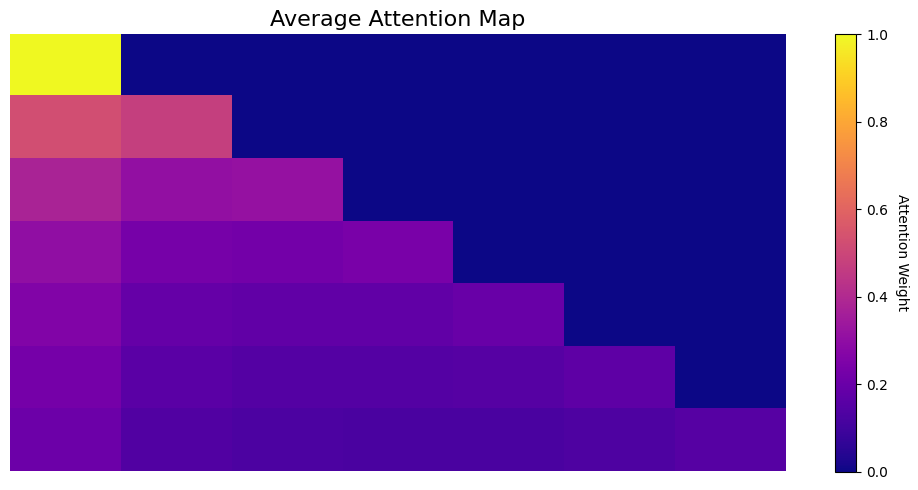

In [ ]:
import matplotlib.pyplot as plt

# Create a subplot for the attention map
fig, ax = plt.subplots(figsize=(10, 5))

# Move the attention weights to CPU and convert to NumPy array
attention_map = normalized_attention_weights[:7,:7].cpu().detach().numpy()

# Plot the attention map with improved visualization
im = ax.imshow(attention_map, cmap='plasma', aspect='auto')  # Using 'coolwarm' colormap
ax.set_title('Average Attention Map', fontsize=16)  # Adjust title font size
ax.axis('off')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Attention Weight', rotation=270, labelpad=15)  # Rotate colorbar label

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print(normalized_attention_weights[:9,:9])

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5090, 0.4910, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3443, 0.3212, 0.3344, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2624, 0.2385, 0.2425, 0.2566, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2142, 0.1928, 0.1909, 0.1946, 0.2076, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1818, 0.1639, 0.1595, 0.1583, 0.1643, 0.1722, 0.0000, 0.0000, 0.0000],
        [0.1591, 0.1431, 0.1384, 0.1349, 0.1363, 0.1395, 0.1488, 0.0000, 0.0000],
        [0.1409, 0.1267, 0.1225, 0.1184, 0.1177, 0.1172, 0.1226, 0.1339, 0.0000],
        [0.1262, 0.1137, 0.1098, 0.1062, 0.1038, 0.1008, 0.1036, 0.1120, 0.1240]],
       device='cuda:0', grad_fn=<SliceBackward0>)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Get the number of samples and decoder layers
num_samples = len(train_dataset)
num_layers = 4

# Create a large figure with subplots
fig, axes = plt.subplots(num_layers, num_samples, figsize=(20, 10))

# Iterate through all decoder layers and samples
for selected_layer in range(num_layers):
    for i, (x, y) in enumerate(train_dataset):
        # Get input data and target data
        #sample_data = train_dataset[selected_sample]
        #x_data = sample_data["X"]  # Input data
        #y_data = sample_data["y"]  # Target data

        # Pass the input data through the model to get attention weights
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        output, dec_attention_weights = transformer(x, mask)

        # Get attention weights for the selected layer
        attention_weights = dec_attention_weights['decoder_layer{}'.format(selected_layer+1)]

        # Plot attention map in the corresponding subplot
        ax = axes[selected_layer, train_dataset]
        ax.imshow(attention_weights[train_dataset].detach().numpy(), cmap='viridis', aspect='auto')
        ax.set_title('Layer {} - Sample {}'.format(selected_layer, train_dataset))
        ax.axis('off')

plt.tight_layout()
plt.show()


IndexError: ignored

Error in callback <function flush_figures at 0x7944163e4430> (for post_execute):


KeyboardInterrupt: ignored